# Neural Computing Coursework - Support Vector Machines (Testing)

This notebook will load the saved model from the training phase of the support vector machine and test on imported test data.

In [ ]:
# PLEASE DO NOT RUN DURING TESTING
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
import pickle
import os

In [ ]:
# PLEASE DO NOT RUN DURING TESTING
# Change directory to current directory
os.chdir("drive/My Drive/Neural Computing")

In [ ]:
# Loading test dataset and preparing it
mnist_test = pd.read_csv("Data/mnist_test.csv")
y_test = mnist_test["label"]
X_test = mnist_test.drop("label", axis = 1)
X_test = X_test.astype("float32")
y_test = y_test.astype("int64")
X_test /= 255.0
X_test = X_test.to_numpy()
X_test = np.float32(X_test)
y_test = np.int64(y_test)

In [ ]:
# Load model using pickle
with open("SVM_trained.pkl", "rb") as f:
  model = pickle.load(f)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9833

In [ ]:
# Calculating confusion matrix 
cf = confusion_matrix(y_test, y_pred)

In [ ]:
# Calculating how many times a digit was misclassified
num_misclassified_list = list()
for i in range(cf.shape[0]):
  num_classified = 0
  for j in range(cf.shape[1]):
    if i != j:
      num_classified += cf[i,j]
  num_misclassified_list.append(num_classified)

for i in range(len(num_misclassified_list)):
  print("The digit {} was misclassified {} times".format(i, num_misclassified_list[i]))

print("Total number of misclassified digits: {}".format(sum(num_misclassified_list)))

The digit 0 was misclassified 7 times
The digit 1 was misclassified 5 times
The digit 2 was misclassified 18 times
The digit 3 was misclassified 16 times
The digit 4 was misclassified 17 times
The digit 5 was misclassified 20 times
The digit 6 was misclassified 13 times
The digit 7 was misclassified 23 times
The digit 8 was misclassified 21 times
The digit 9 was misclassified 27 times
Total number of misclassified digits: 167


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


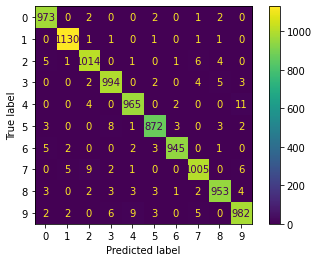

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(model, X_test, y_test)